In [32]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import rdf
import MDAnalysis.analysis.msd as msd

In [33]:
import os
# change python directory to /home/gmh4/projects/CompLab/comp-lab-class
os.chdir('/home/jh8862/theory-lab/comp-lab-2023/Week9/Analysis')

In [34]:
trajpath = '../Data/equiltrajs'
dcdpath = '../Data/dcds'
trajfiles = sorted(os.listdir(trajpath))
dcdfiles = sorted(os.listdir(dcdpath))

In [8]:
#Load molecule trajectory
u = mda.Universe("../Data/equil/kalj_T1_n360_v300_50000_1.lammpstrj", "../Data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd", topology_format="LAMMPSDUMP")


In [35]:
unique_atom_types = set(atom.type for atom in u1_5.atoms)
unique_atom_types

{'1', '2'}

In [36]:
type1 = u1_5.select_atoms("type 1")

In [37]:
type2 = u1_5.select_atoms("type 2")

In [42]:
#Compute RDF
rdf1 = rdf.InterRDF(type1, type2)
rdf1.run()

In [12]:
titles = ["T=0.475", "T=0.55", "T=0.5", "T=0.65", "T=0.6", "T=0.7", "T=0.8", "T=0.9", "T=1.5", "T=1"]

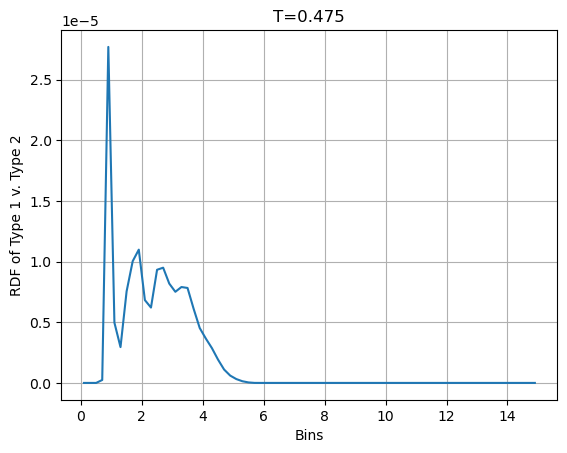

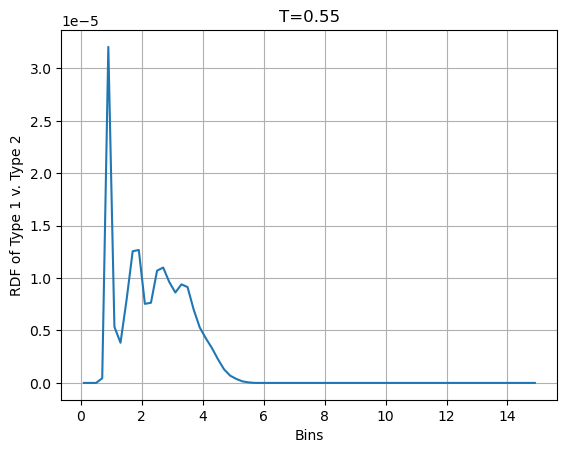

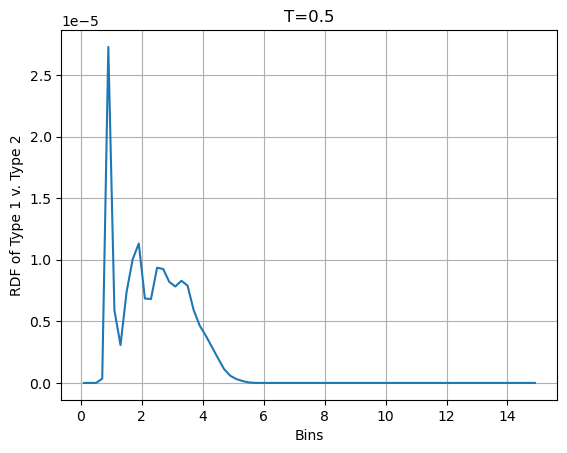

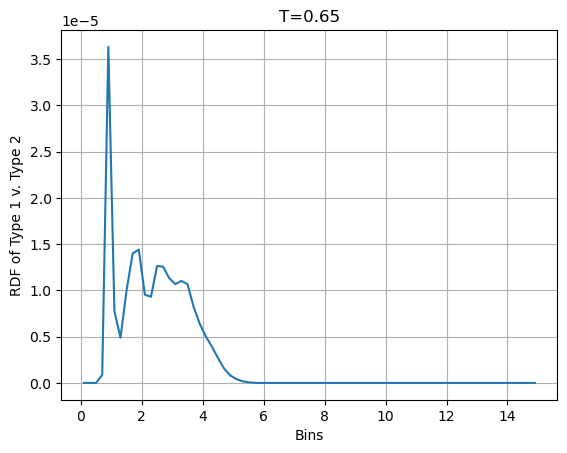

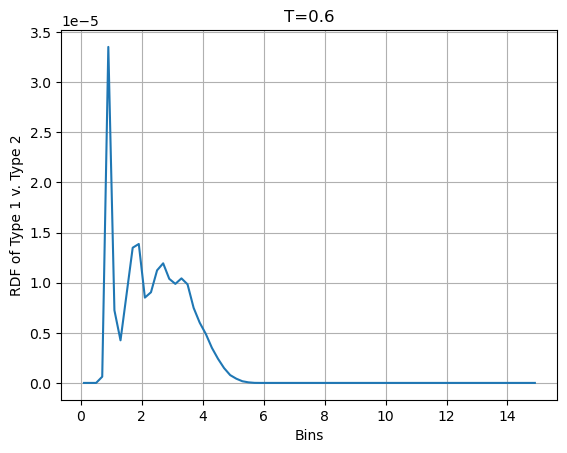

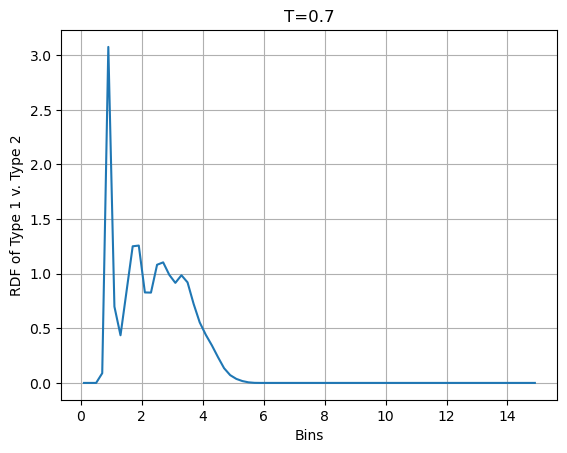

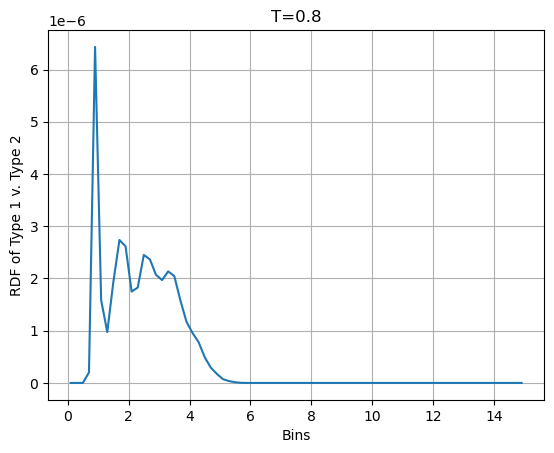

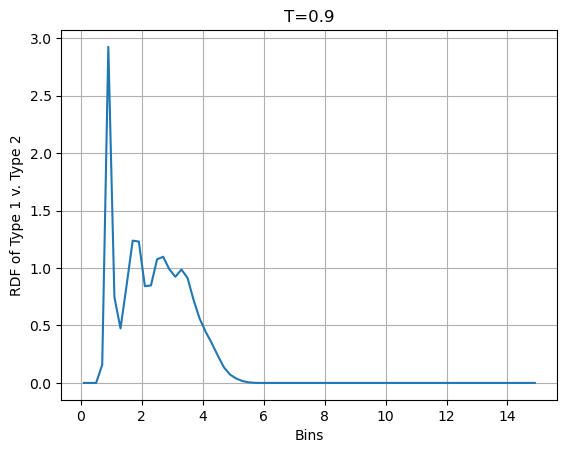

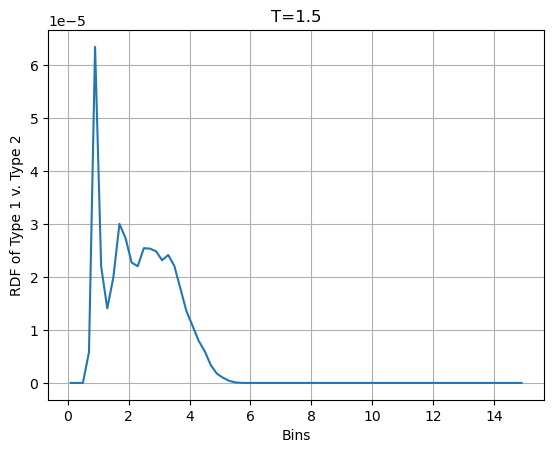

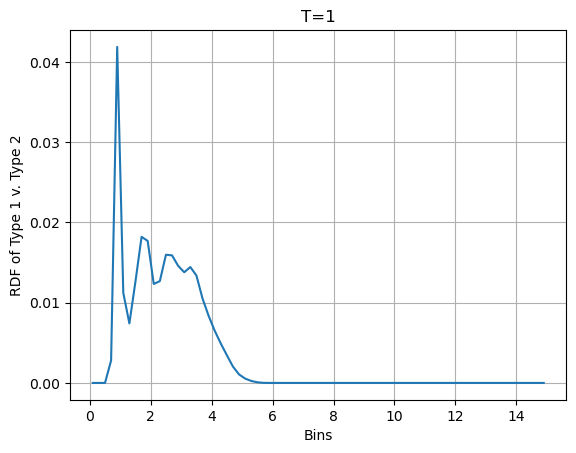

In [19]:
for traj, dcd, title in zip(trajfiles, dcdfiles, titles):
    trajfile = os.path.join(trajpath, traj)
    dcdfile = os.path.join(dcdpath, dcd)
    #print(trajfile)
    #print(dcdfile)
    u = mda.Universe(trajfile, dcdfile, topology_format="LAMMPSDUMP")
    type1 = u.select_atoms("type 1")
    type2 = u.select_atoms("type 2")
    rdf1 = rdf.InterRDF(type1, type2)
    rdf1.run()
    fig, ax = plt.subplots()
    ax.plot(rdf1.bins, rdf1.rdf)
    ax.set(xlabel='Bins', ylabel="RDF of Type 1 v. Type 2")
    ax.set_title(title)
    ax.grid()
    file = "../Figures/g_12_" + title + ".png"
    fig.savefig(file, dpi=300, bbox_inches="tight")

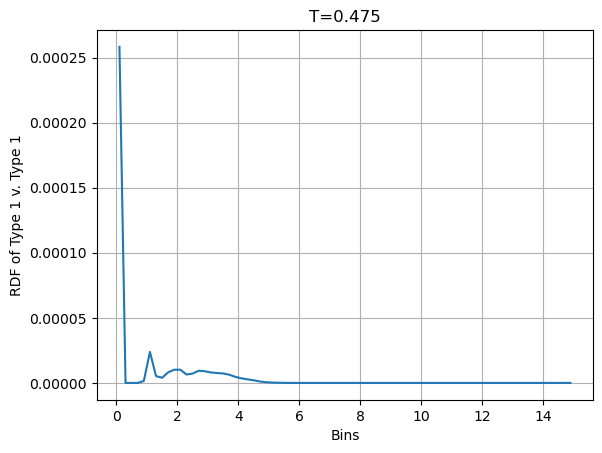

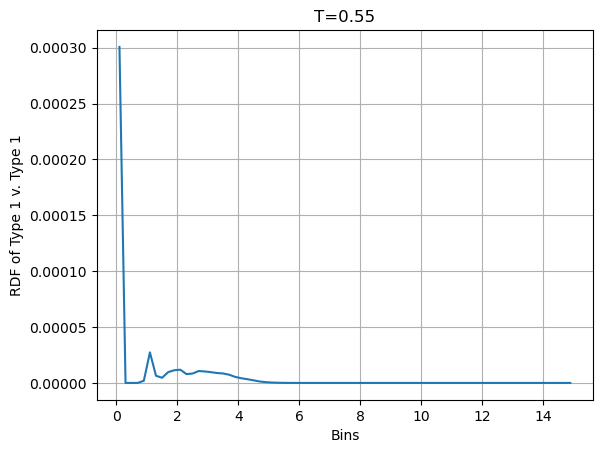

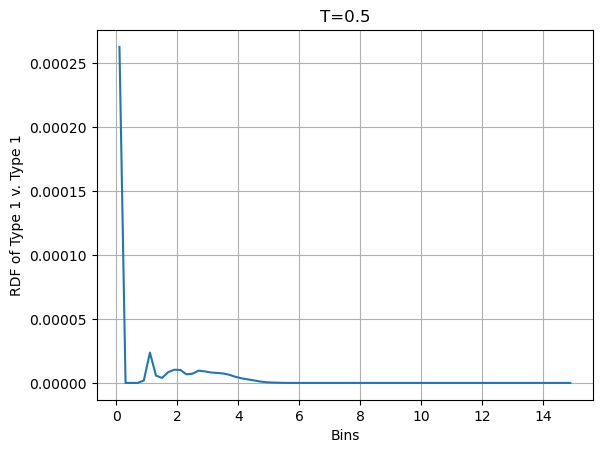

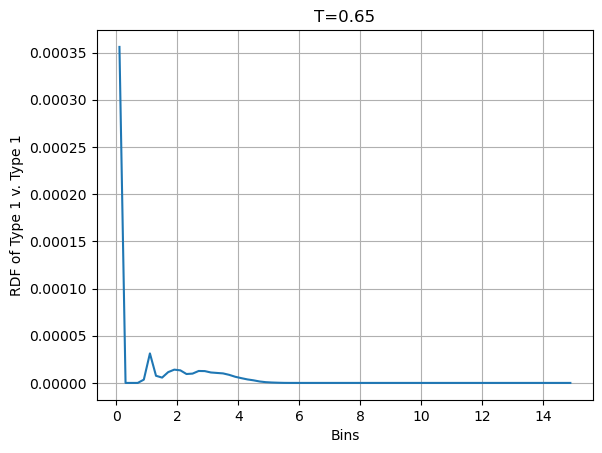

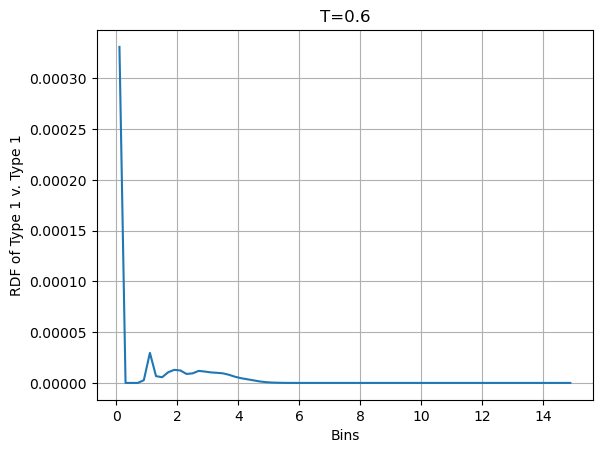

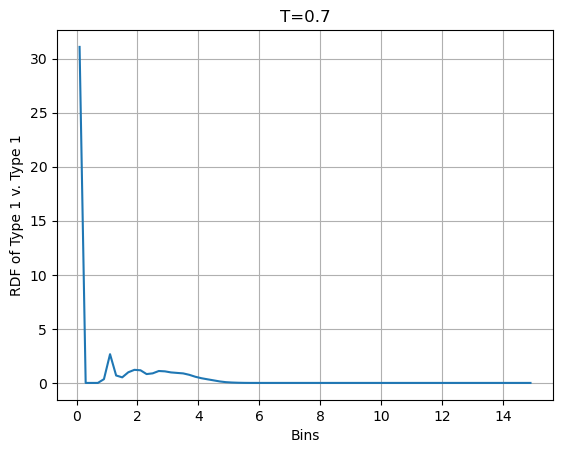

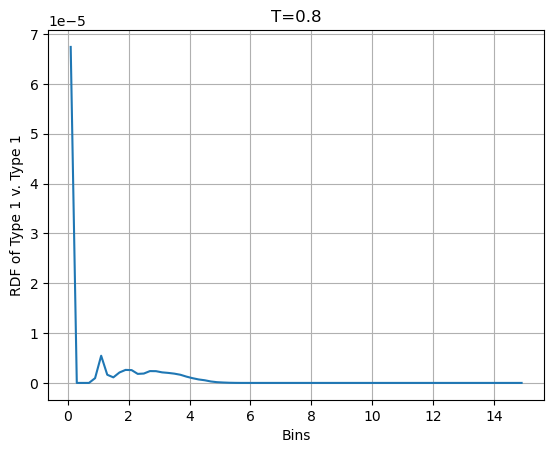

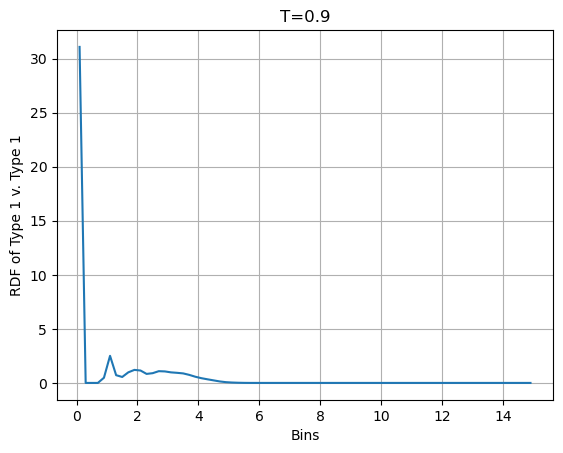

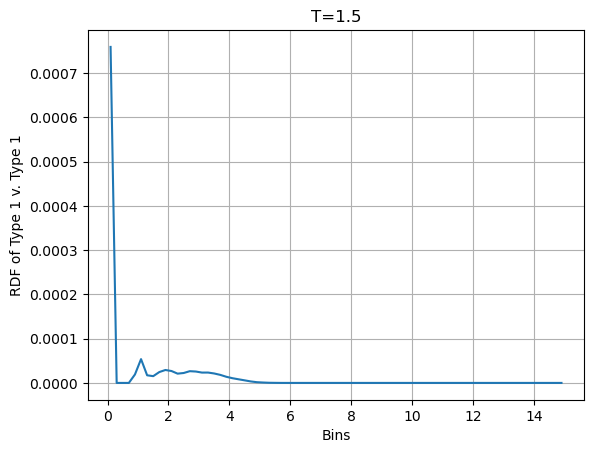

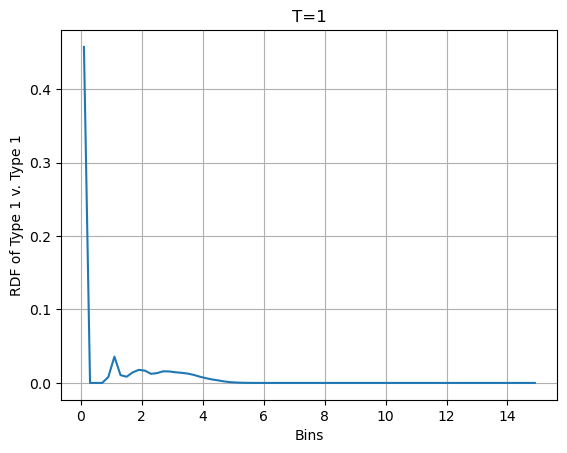

In [20]:
for traj, dcd, title in zip(trajfiles, dcdfiles, titles):
    trajfile = os.path.join(trajpath, traj)
    dcdfile = os.path.join(dcdpath, dcd)
    #print(trajfile)
    #print(dcdfile)
    u = mda.Universe(trajfile, dcdfile, topology_format="LAMMPSDUMP")
    type1 = u.select_atoms("type 1")
    rdf1 = rdf.InterRDF(type1, type1)
    rdf1.run()
    fig, ax = plt.subplots()
    ax.plot(rdf1.bins, rdf1.rdf)
    ax.set(xlabel='Bins', ylabel="RDF of Type 1 v. Type 1")
    ax.set_title(title)
    ax.grid()
    file = "../Figures/g_11_" + title + ".png"
    fig.savefig(file, dpi=300, bbox_inches="tight")

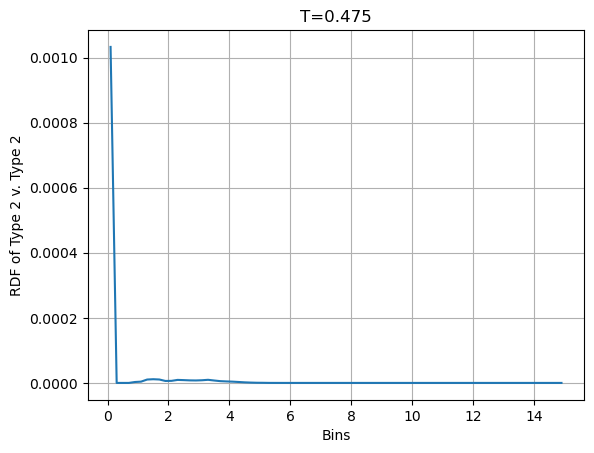

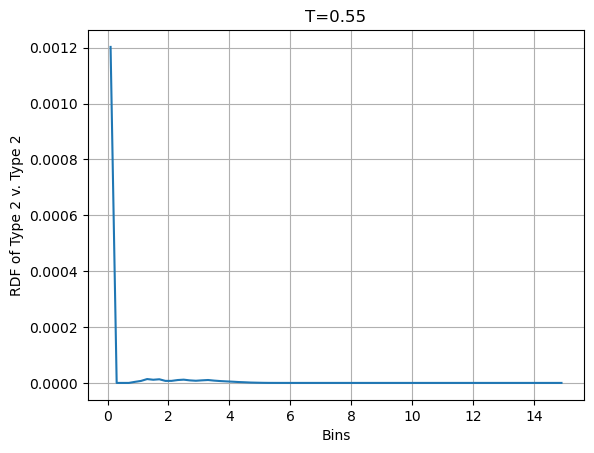

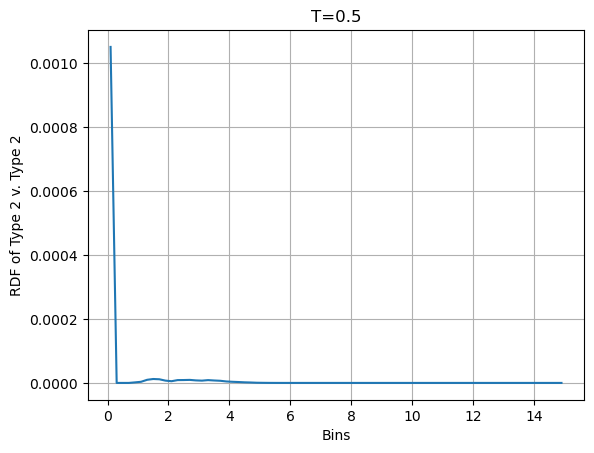

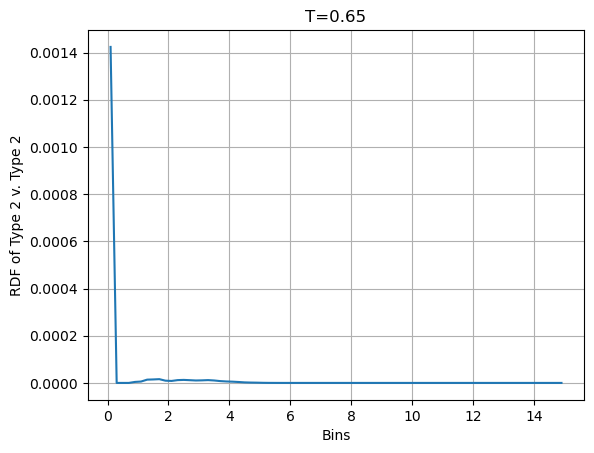

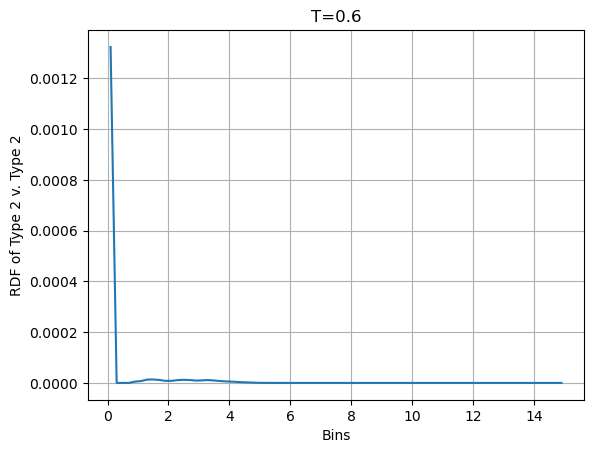

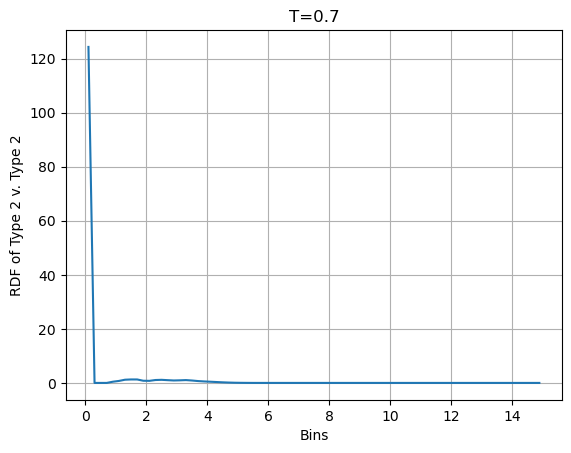

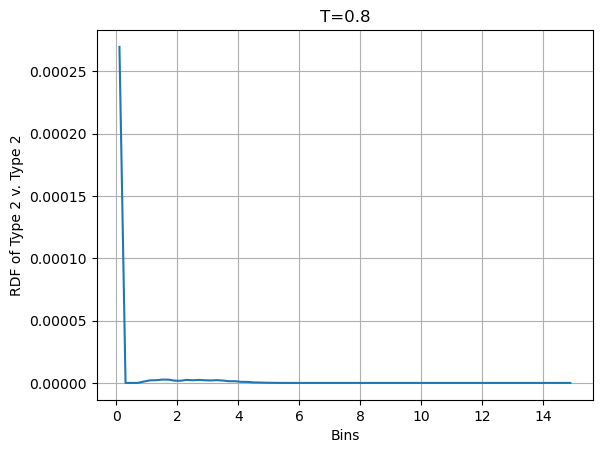

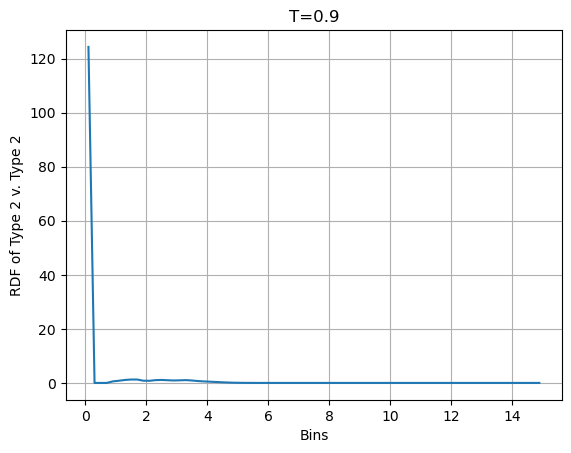

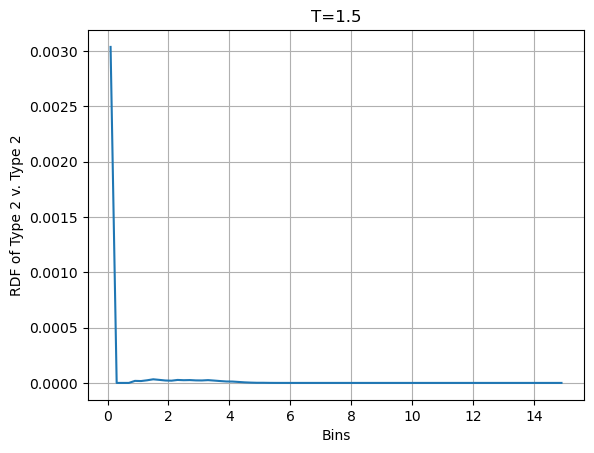

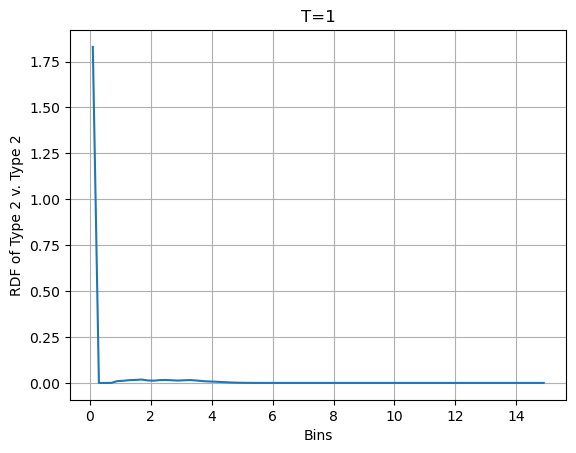

In [21]:
for traj, dcd, title in zip(trajfiles, dcdfiles, titles):
    trajfile = os.path.join(trajpath, traj)
    dcdfile = os.path.join(dcdpath, dcd)
    #print(trajfile)
    #print(dcdfile)
    u = mda.Universe(trajfile, dcdfile, topology_format="LAMMPSDUMP")
    type2 = u.select_atoms("type 2")
    rdf1 = rdf.InterRDF(type2, type2)
    rdf1.run()
    fig, ax = plt.subplots()
    ax.plot(rdf1.bins, rdf1.rdf)
    ax.set(xlabel='Bins', ylabel="RDF of Type 2 v. Type 2")
    ax.set_title(title)
    ax.grid()
    file = "../Figures/g_22_" + title + ".png"
    fig.savefig(file, dpi=300, bbox_inches="tight")

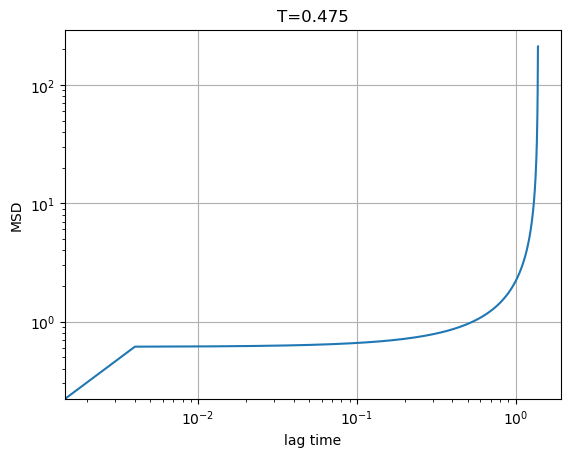

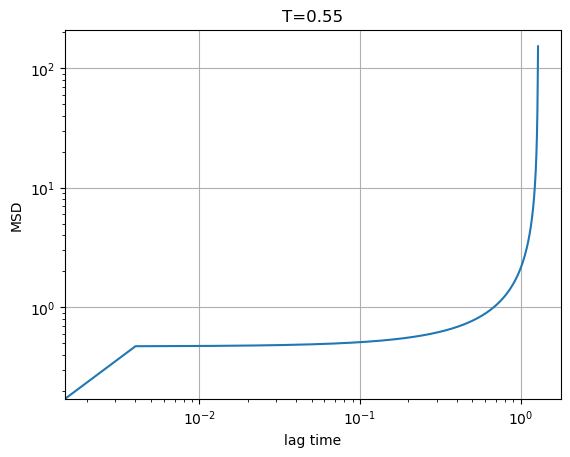

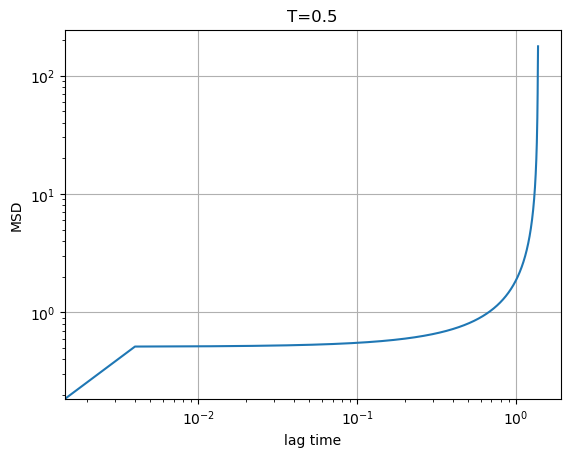

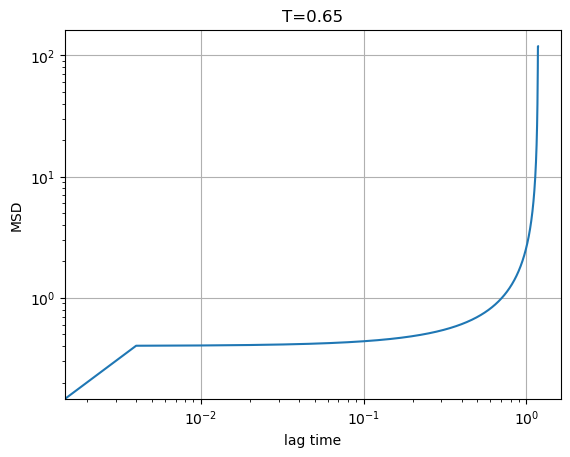

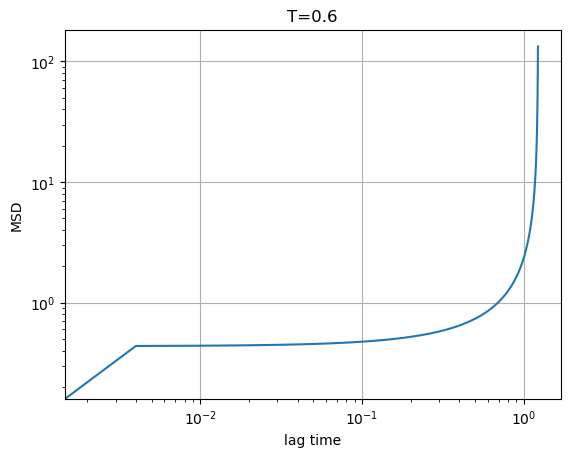

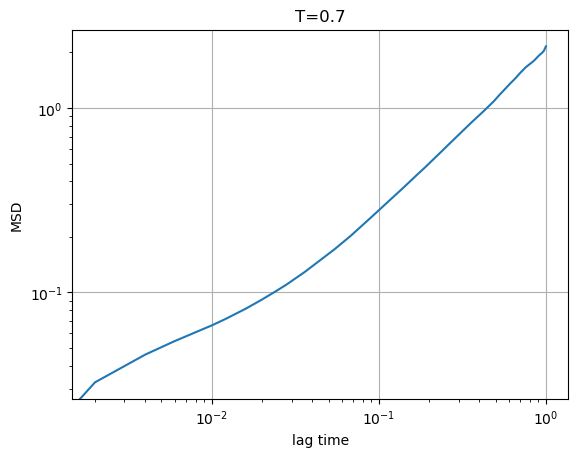

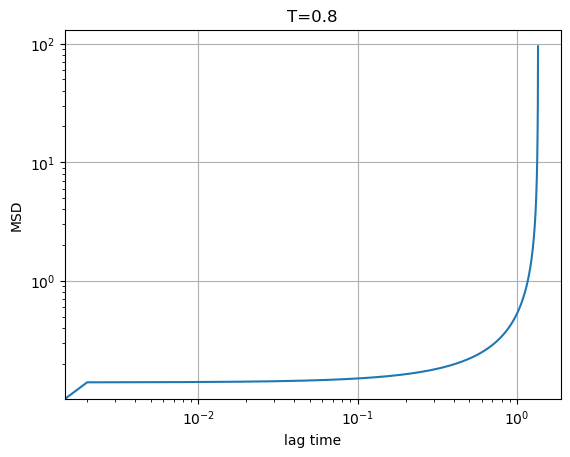

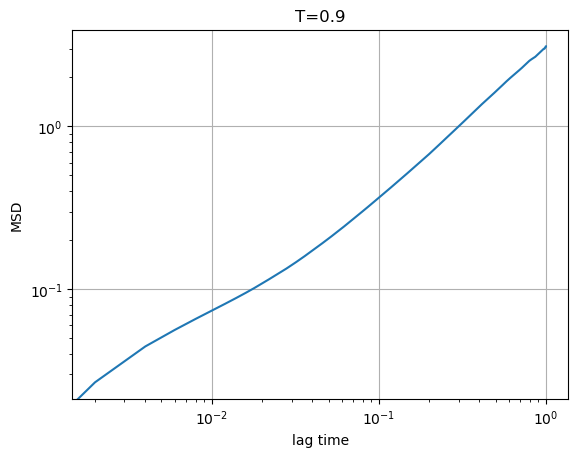

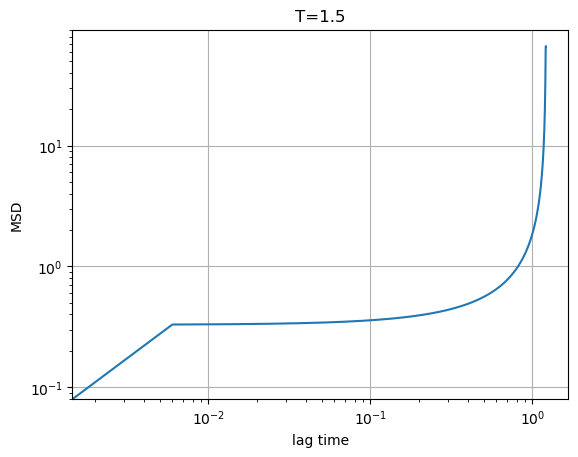

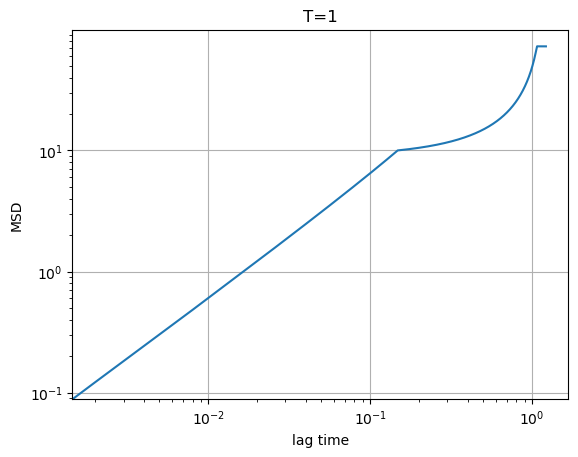

In [31]:
#compute MSD
for traj, dcd, title in zip(trajfiles, dcdfiles, titles):
    trajfile = os.path.join(trajpath, traj)
    dcdfile = os.path.join(dcdpath, dcd)
    #print(trajfile)
    #print(dcdfile)
    u = mda.Universe(trajfile, dcdfile, topology_format="LAMMPSDUMP")
    MSD = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True)
    MSD.run()
    msd_results = MSD.results.timeseries
    nframes = MSD.n_frames
    timestep = 0.002 # this needs to be the actual time between frames
    lagtimes = np.arange(nframes)*timestep # make the lag-time axis
    fig, ax = plt.subplots()
    ax.loglog(lagtimes, msd_results)
    ax.set(xlabel='lag time', ylabel="MSD")
    ax.set_title(title)
    ax.grid()
    file = "../Figures/MSD_" + title + ".png"
    fig.savefig(file, dpi=300, bbox_inches="tight")


In [66]:
temps = [0.475, 0.55, 0.5, 0.65, 0.6, 0.8, 1.5, 1.0]

In [59]:
times = np.zeros(0)

In [60]:
#make 1/T graphs
for traj, dcd, title in zip(trajfiles, dcdfiles, titles):
    trajfile = os.path.join(trajpath, traj)
    dcdfile = os.path.join(dcdpath, dcd)
    print(trajfile)
    print(dcdfile)
    u = mda.Universe(trajfile, dcdfile, topology_format="LAMMPSDUMP")
    MSD = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True)
    MSD.run()
    msd_results = MSD.results.timeseries
    nframes = MSD.n_frames
    timestep = 0.002 # this needs to be the actual time between frames
    lagtimes = np.arange(nframes)*timestep # make the lag-time axis
    index_closest_to_1 = np.argmin(np.abs(msd_results - 1)) #getting time when msd is closest to 1
    result = lagtimes[index_closest_to_1]
    times = np.append(times, result)

../Data/equiltrajs/kalj_T0.475_n360_v300_30000000_1.lammpstrj
../Data/dcds/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.55_n360_v300_3000000_1.lammpstrj
../Data/dcds/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.5_n360_v300_10000000_1.lammpstrj
../Data/dcds/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.65_n360_v300_350000_1.lammpstrj
../Data/dcds/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.6_n360_v300_1000000_1.lammpstrj
../Data/dcds/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.7_n360_v300_180000_1.lammpstrj
../Data/dcds/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.8_n360_v300_150000_1.lammpstrj
../Data/dcds/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd
../Data/equiltrajs/kalj_T0.9_n360_v300_150000_1.lammpstrj
../Data/dcds/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd
../Data/equiltrajs/kalj_T1.5_n360_v300_10000_1.lammp

In [61]:
times

array([0.54 , 0.678, 0.67 , 0.708, 0.692, 0.444, 1.168, 0.3  , 0.816,
       0.016])

In [64]:
mod_times = np.delete(times, [5, 7])

In [65]:
mod_times

array([0.54 , 0.678, 0.67 , 0.708, 0.692, 1.168, 0.816, 0.016])

In [70]:
temps_np = np.array(temps)
oneoverT = 1 / temps_np

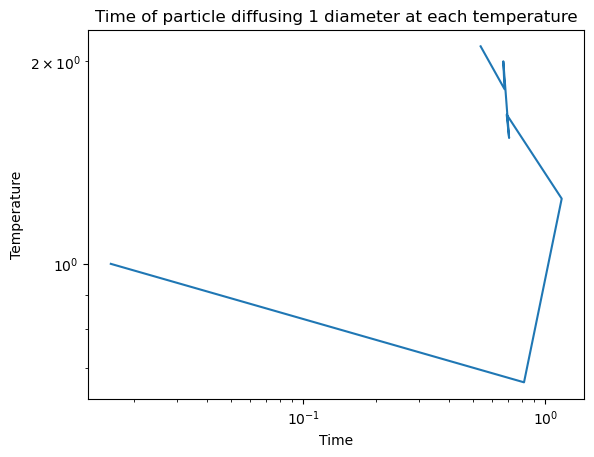

In [77]:
plt.loglog(mod_times, oneoverT)
plt.title("Time of particle diffusing 1 diameter at each temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.savefig("../Figures/timeofparticlediffusing1diameter.png", dpi=300, bbox_inches="tight")
plt.show()